In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as im

In [2]:
signal = np.array([0 for _ in range(10000)] + [1 for _ in range(10000)])

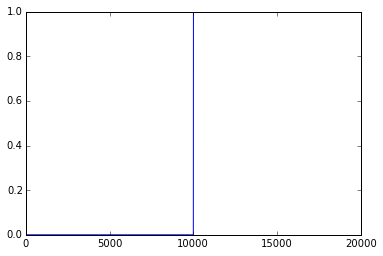

In [3]:
plt.plot(signal)

In [4]:
fft = np.fft.fft(signal)

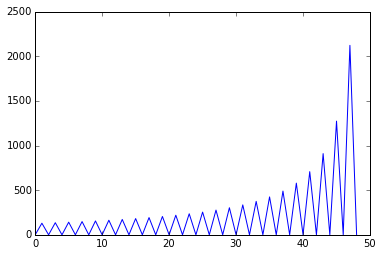

In [9]:
plt.plot(np.abs(fft[-50:-1]))

In [18]:
def sigmoid(x,c,q):
    return 1/(1+np.exp((x-c)*q))

In [52]:
f = lambda x : sigmoid(x,1,-0.004) - sigmoid(x,20000-1,-0.004)
mask = np.array(list(map(f,range(0,20000))))

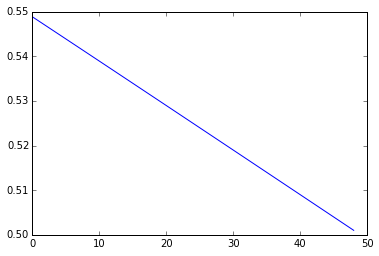

In [53]:
plt.plot(mask[-50:-1])

In [54]:
fft2 = fft * mask

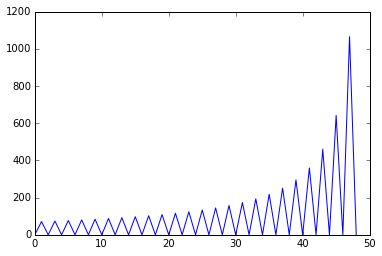

In [55]:
plt.plot(abs(fft2[-50:-1]))

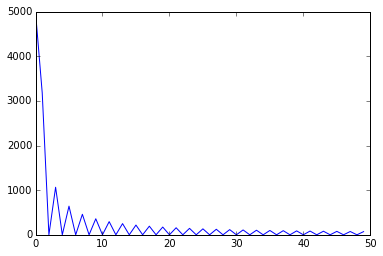

In [56]:
plt.plot(abs(fft2[0:50]))

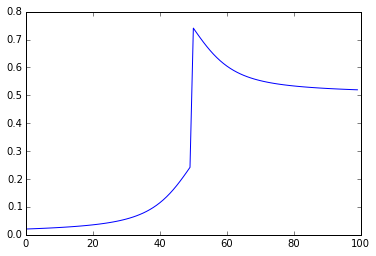

In [58]:
plt.plot(np.abs(np.fft.ifft(fft2))[9950:10050])

In [3]:
# Let's do a numerical simulation
import math

In [62]:
def sim(C,R,f): # Farads, Ohms, Hertz
    Q_c = 0 # Charge on cap
    length = 5.0 # second
    steps = 100000
    dt = length / steps
    v_source = lambda t : math.sin(f*2*math.pi*t)
    v_rs = []
    for i in range(0,steps):
        t = i*length/steps
        v_in = v_source(t)
        v_c = Q_c / C
        v_r = v_in - v_c
        I = v_r / R
        Q_c += I*dt
        
        v_rs.append(v_r)
    return v_rs

0.5320556905399372


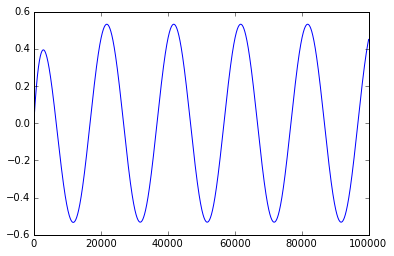

In [69]:
res = sim(0.0001,1000,1)
print(max(res))
plt.plot(res)

0.9878110550342039


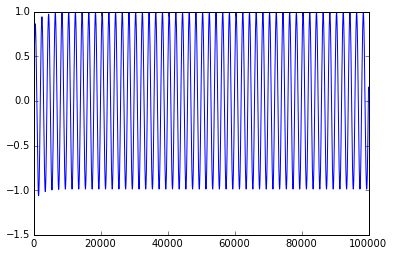

In [71]:
res = sim(0.0001,1000,10)
print(max(res))
plt.plot(res)

In [75]:
def simPulse(C,R): # Farads, Ohms, Hertz
    Q_c = 0 # Charge on cap
    length = .1 # second
    steps = 1000000
    dt = length / steps
    v_source = lambda t : (t > 0.01)
    v_rs = []
    for i in range(0,steps):
        t = i*length/steps
        v_in = v_source(t)
        v_c = Q_c / C
        v_r = v_in - v_c
        I = v_r / R
        Q_c += I*dt
        
        v_rs.append(v_r)
    return v_rs

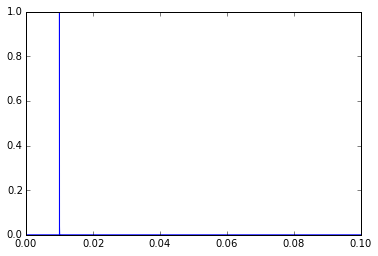

In [115]:
res = simPulse(1e-9,1e4)
plt.plot(np.arange(1e6)/1e7, np.array(res))

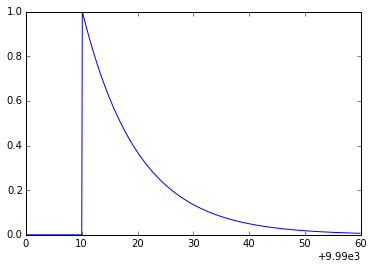

In [117]:
plt.plot((np.arange(1e6)/1e1)[99900:100500], np.array(res)[99900:100500])